In [6]:
from matplotlib import pyplot as plt
import pandas as pd

import sys, os
sys.path.insert(0, os.path.abspath('../scripts/'))
import footyviz

# Loading Data



In [8]:
data = pd.read_csv('../datasets/positional_data/liverpool_2019.csv', index_col=('play', 'frame'))
data.tail()


Unnamed: 0 bgcolor   dx   dy edgecolor  \
play                        frame                                           
Leicester 0 - [3] Liverpool 120          2745    blue  0.0  0.0     white   
                            121          2746    blue  0.0  0.0     white   
                            122          2747    blue  0.0  0.0     white   
                            123          2748    blue  0.0  0.0     white   
                            124          2749    blue  0.0  0.0     white   

                                   player  player_num     team          x  \
play                        frame                                           
Leicester 0 - [3] Liverpool 120     10267         NaN  defense  98.724826   
                            121     10267         NaN  defense  98.724826   
                            122     10267         NaN  defense  98.724826   
                            123     10267         NaN  defense  98.724826   
                            124     10267         NaN  defense  98.724826   

                                           y    z  
play                        frame                  
Leicester 0 - [3] Liverpool 120    53.720353  0.0  
                            121    53.720353  0.0  
                            122    53.720353  0.0  
                            123    53.720353  0.0  
                            124    53.720353  0.0

In [9]:
#list of goals included in the dataset
data.index.get_level_values('play').unique()

Index(['Liverpool [3] - 0 Bournemouth', 'Bayern 0 - [1] Liverpool',
       'Fulham 0 - [1] Liverpool', 'Southampton 1 - [2] Liverpool',
       'Liverpool [2] - 0 Porto', 'Porto 0 - [2] Liverpool',
       'Liverpool [4] - 0 Barcelona', 'Liverpool [1] - 0 Wolves',
       'Liverpool [3] - 0 Norwich', 'Liverpool [2] - 1 Chelsea',
       'Liverpool [2] - 1 Newcastle', 'Liverpool [2] - 0 Salzburg',
       'Genk 0 - [3] Liverpool', 'Liverpool [2] - 0 Man City',
       'Liverpool [1] - 0 Everton', 'Liverpool [2] - 0 Everton',
       'Bournemouth 0 - 3 Liverpool', 'Liverpool [1] - 0 Watford',
       'Leicester 0 - [3] Liverpool'],
      dtype='object', name='play')

In [10]:
play = 'Liverpool [4] - 0 Barcelona'
df = data.loc[play]
df.tail()

,Unnamed: 0,bgcolor,dx,dy,edgecolor,player,player_num,team,x,y,z
frame,,,,,,,,,,,
134,2775,red,0.053492,0.002798,white,24771,NaN,attack,81.482130,56.912439,0.0
135,2776,red,0.047360,0.003669,white,24771,NaN,attack,81.529490,56.916108,0.0
136,2777,red,0.041016,0.004583,white,24771,NaN,attack,81.570506,56.920691,0.0
137,2778,red,0.034459,0.005541,white,24771,NaN,attack,81.604964,56.926231,0.0
138,2779,red,0.027689,0.006542,white,24771,NaN,attack,81.632653,56.932773,0.0


# Basic Plotting

You may have noticed I picked an interesting goal. It was my favorite football moment from 2019: a simple corner taken quickly.

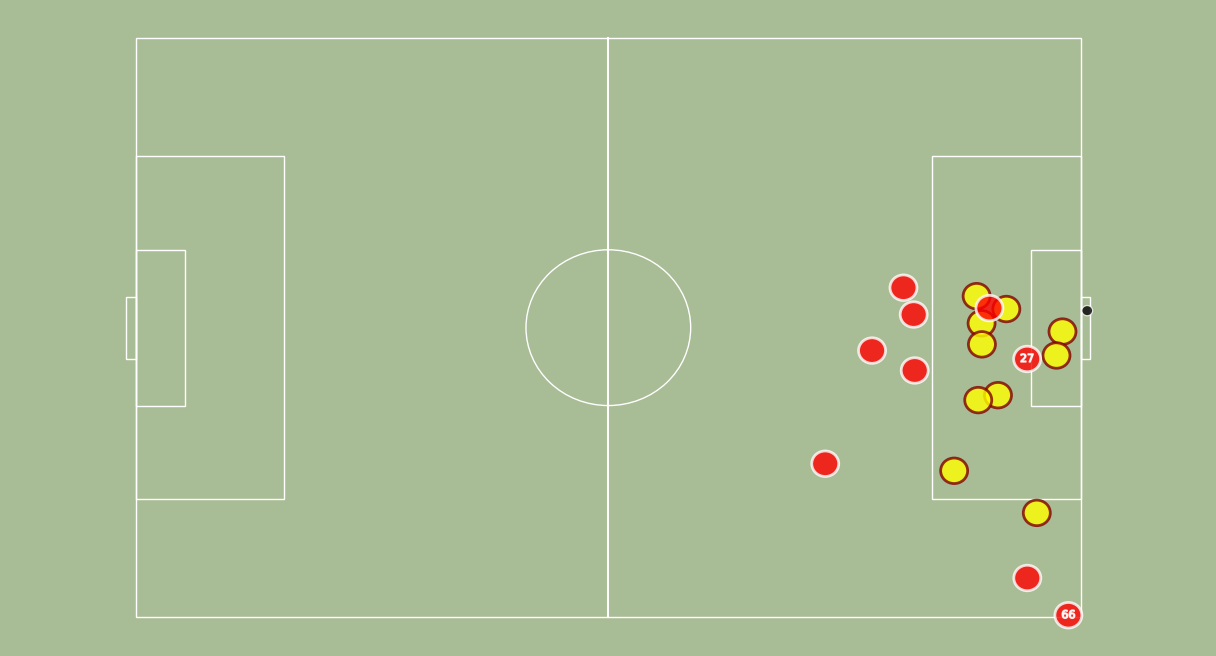

In [17]:
fig, ax, dfFrame = footyviz.draw_frame(df, t=6.5)

This was probably what was on Trent Alexander-Arnold's head:

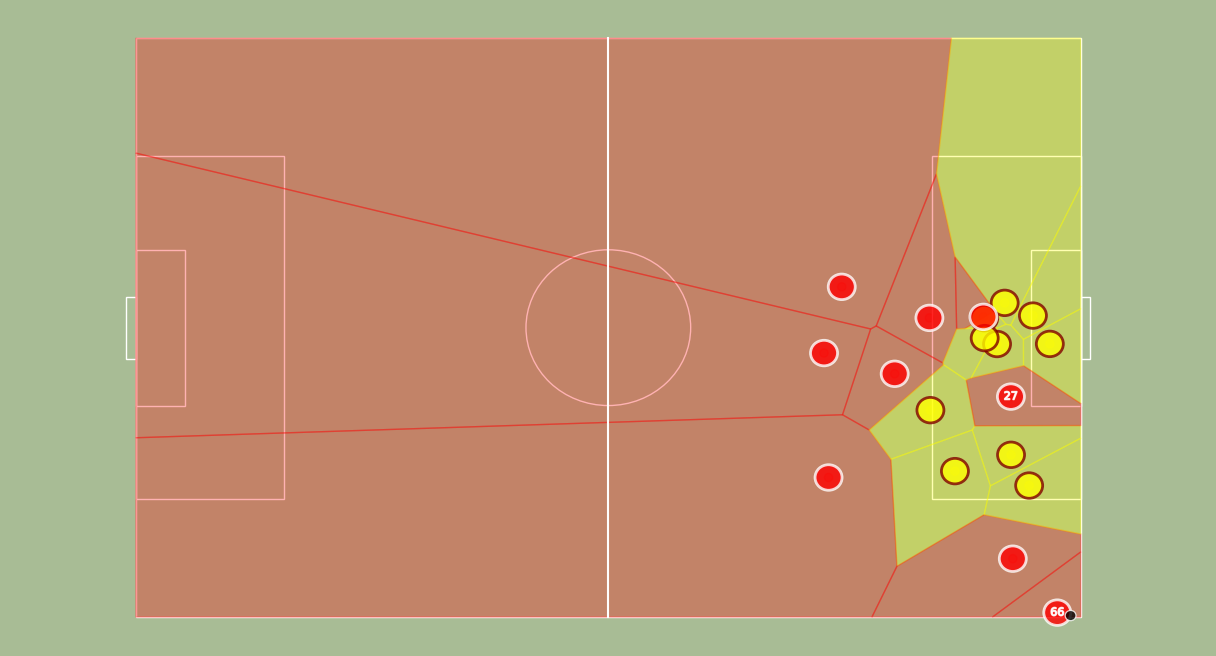

In [19]:
fig, ax, dfFrame = footyviz.draw_frame(df, t=4)
fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)

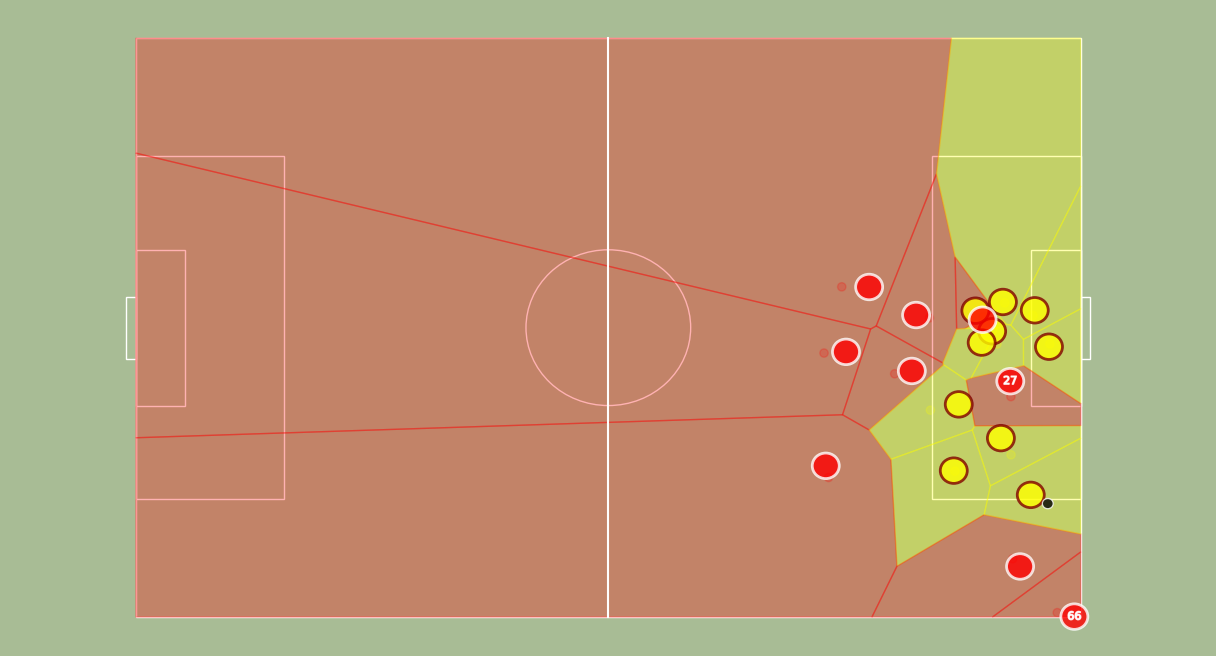

In [20]:
#you can mix different frames for the player's positioning and for the voronoi (e.g. fixing the voronoi to the time of the pass)
fig, ax, dfFrame = footyviz.draw_frame(df, t=5)
dfFrame_for_voronoi = footyviz.get_frame(df, t=4)
fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame_for_voronoi)

# MoviePy

MoviePy is a Python module for video editing that works nicely with matplotlib and Jupyter and is built on top of FFmpeg. You may think you never used FFMpeg, but you have. From Wikipedia:

> FFmpeg is used by software such as VLC media player, xine, Cinelerra-GG video editor, Plex, Kodi, Blender, HandBrake, YouTube, and MPC-HC; it handles video and audio playback in Google Chrome, and Linux version of Firefox. 

You can find MoviePy's documentation at: https://zulko.github.io/moviepy/

Let's start with a basic animation:

In [21]:
from moviepy import editor as mpy
from moviepy.video.io.bindings import mplfig_to_npimage

def draw_frame_x(df, t, fps, voronoi=False):
    fig,ax,dfFrame = footyviz.draw_frame(df, t=t, fps=fps)
    if voronoi:
        fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)
    image = mplfig_to_npimage(fig)
    plt.close()
    return image    

def make_animation(df, fps=20, voronoi=False):
    #calculated variables
    length=(df.index.max()+20)/fps
    clip = mpy.VideoClip(lambda x: draw_frame_x(df, t=x, fps=fps, voronoi=voronoi), duration=length-1).set_fps(fps)
    return clip

clip = make_animation(df)

clip.ipython_display()
clip.write_videofile("Goal.mp4")

t:   1%|▏         | 2/138 [00:00<00:09, 14.79it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


t:   0%|          | 0/138 [00:00<?, ?it/s, now=None]

Moviepy - Building video Goal.mp4.
Moviepy - Writing video Goal.mp4



Moviepy - Done !
Moviepy - video ready Goal.mp4


This isn't much different from what you can do with Matplotlib's native animate capabilities.

The advantage of having MoviePy in the mix is having easy accsess to editing, compositing and transformation functions. Let's try some examples:

In [23]:
clip.rotate(90).ipython_display()

t:   0%|          | 0/138 [00:00<?, ?it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [24]:
#moviepy allows for method chaining several effects in one line of code:
clip.rotate(90).crop(y1=100, y2=500).ipython_display()

t:   0%|          | 0/138 [00:00<?, ?it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


Linear editing is easy with the ``subclip`` method (for trimming) and ``concatenate_videoclips`` function (to join clips):

In [29]:
full_clip = mpy.concatenate_videoclips([make_animation(data.loc[play]) for play in data.index.get_level_values('play').unique()])

print('normal speed:', full_clip.duration, 'seconds')
print('2x speed:', full_clip.speedx(2).duration, 'seconds')

full_clip.ipython_display(t=50)
full_clip.write_videofile("AllGoals.mp4")

normal speed: 176.5 seconds
2x speed: 88.25 seconds


t:   0%|          | 0/3530 [00:00<?, ?it/s, now=None]

Moviepy - Building video AllGoals.mp4.
Moviepy - Writing video AllGoals.mp4



Moviepy - Done !
Moviepy - video ready AllGoals.mp4


Non-linear editing uses the ``CompositeClip`` object:


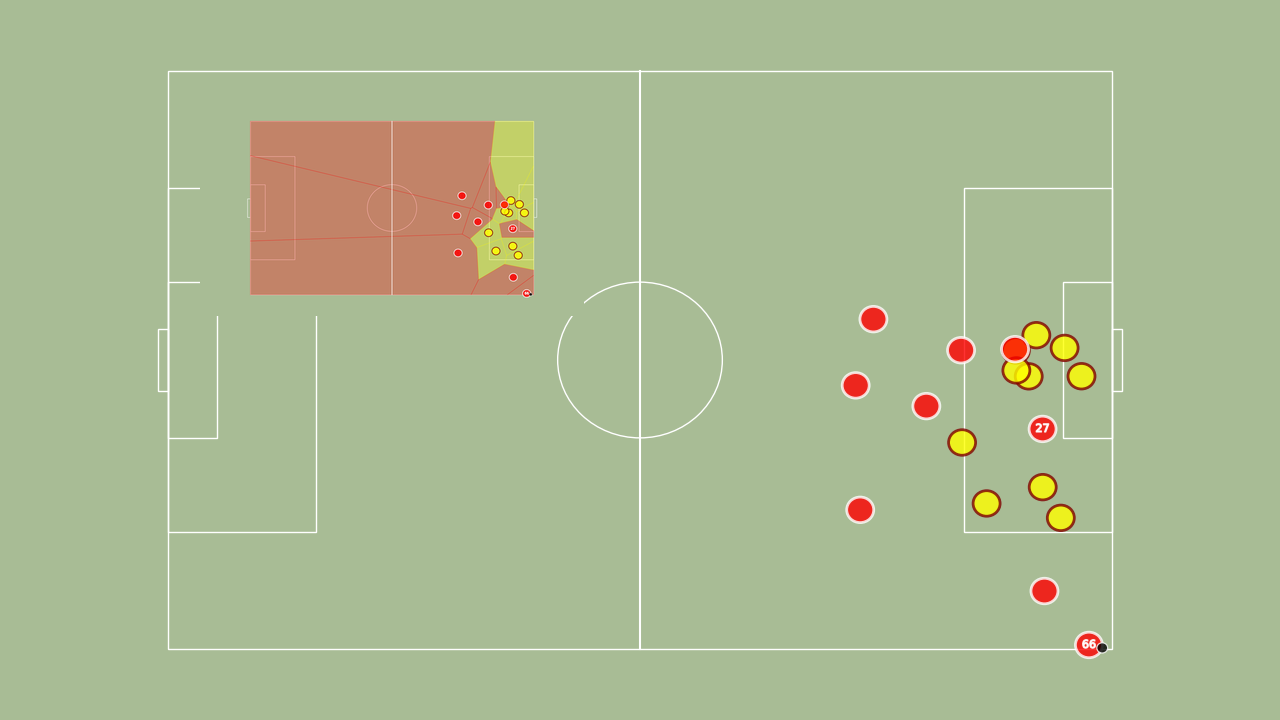

In [30]:
clip_voronoi = make_animation(df, voronoi=True)
composite_clip = mpy.CompositeVideoClip([clip, clip_voronoi.resize(0.3).set_position((200,100))])
composite_clip.ipython_display(t=4)